# Week 8 Exercises
For this week the important exercises is 1,2,3, 4, 5

The rest are coding exercises that allows the interested student to play with neural nets with pytorch. These are of course important, but it is more important to finish the hand in. 
We suggest that solving the exercise in order they are presented.

Beware that running deep learning is rather time consuming when we employ convolutional networks without gpu support (which requires some installation and is not required) so keep your nets manageable and tune learning rate and other paramters carefully.
You can use any pytorch functionality you want and you can find all the pieces we have talked about in the course.

## Ex 1: Verify the of Gods of Algebra: Vectorized  derivatives for Neural Nets - single data point

Let $x$ be a data point ($1 \times d$) vector and $W$ a weight matrix of shape $d \times h$ used in the neural net 
$$
\textrm{nn}(x) = (xW_1 + b_1)W_2 + b_2
$$
Let $e$ be the error function considered

Furthermore, let
$$
s = x W, \quad v = \frac{\partial e}{\partial s} = \left[\frac{\partial e}{\partial s[a]}, a=1,\dots, h\right]
$$ 
both $1 \times h$ vectors (we have ignored indexing of W here for notational simplicity and the bias to since we are not considering it here).

We need to check that 

$$
\frac{\partial e}{\partial W} = x^\intercal v
$$
as claimed in the lecture. 

We will check it by deriving
$$
\frac{\partial e}{\partial W_{i, j}}
$$
a derivative of just one entry in $W$ and see that it fits (for that the problem is the derivative of a function from one number to one number).

**TASK**
- Step 1: Derive $\frac{\partial s_1}{\partial W_{i,j}} = \left[\frac{\partial s_1[a]}{\partial W_{i, j}}, a=1,\dots, h\right]$  - it is a $h \times 1$ vector. **Hint:** it contains mostly zeros except at one important place.
- Step 2: Use Chain Rule to show that $\frac{\partial e}{\partial W_{i, j}} = x_i v_j$ and conclude the formula fits



## Ex 2: Verify the of Gods of Algebra: Vectorized  derivatives for Neural Nets - batch of data
With that formula above in place, we can now try and optimize for the case where we replace the single data point $x$ with a mini-batch of data $X$.

Let $X$ be a mini-batch of data points ($n \times d$) vector and $W$ a weight matrix of shape $d \times h$ used the same net as above.
To evaluate all elements in the minibatch we get

$$
\textrm{nn}(X) = (XW_1 + b_1)W_2 + b_2
$$

which outputs an $n \times 1$ vector instead of just one number.

The error function considered is the sum of errors over the data in the batch  

$$
\sum_{a=1}^n e(y_a, \textrm{nn}(x_a))
$$ 

where $e$ is some error as above above, and $x_a$ is the $a'th$ row in X (as a $1 \times d$ vector) and $y_a$ is the target value for $x_a$.

Furthermore, let

$$
S = X W, \quad V = \frac{\partial e}{\partial S} 
$$ 

both $n \times h$ matrices, having a row for every input point $x \in X$. So it is the same as above applied for the $n$ points instead of one and placed in the rows of matrices $S$ and $V$.

We know that if $X$ (and hence $S, V$) only has one row then the result is given above.
To get derivatives of the sum we must sum the derivative and hence
$$
 \sum_{a=1}^ n \frac{\partial e(y_a, \textrm{nn}(x_a))}{\partial W} = \sum_{a=1}^n x_a^\intercal v_a
$$
where $x_a$ is the $a$'th row of $X$ and $v_a$ is the $a$'th row of V.


**Task:** 
Show how to rewrite this sum into one matrix product and argue correctness.


## Ex 3: Convolution and Pooling
In this exercise we will see if we can get a better grasp of convolution and pooling.
Your job is to implement basic convolution and pooling

- The Convolution operator that takes a $d \times d$ weight matrix and and 1 channel image, and applies the convolution with the weight vector with the image.
- The max pooling operator takes an input image and a max pooling size and returns the pooled output.
- Test your convolution implementation with the $3 \times 3$ matrix with -1 everywhere execpt the middle and 8 in the middle is a classic edge detector pattern.
- Test your pooling implementation by applying a $2 \times 2$ max pooling to the output of the convolution.


To compare your implementation we have given code that applies the convolution and the pooling operator from the neural net package in pytorch.




Download Lena at : https://users-cs.au.dk/jallan/ml/data/lena512_gray.bmp
image shape (512, 512)


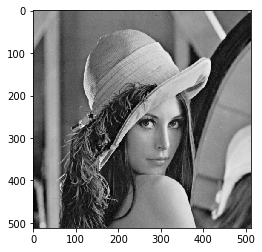

In [3]:
# lena - fint better image
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
filename = 'lena512_gray.bmp'
print('Download Lena at :', 'https://users-cs.au.dk/jallan/ml/data/{0}'.format(filename))
if not os.path.exists(filename):
    print('Download Lena:', 'https://users-cs.au.dk/jallan/ml/data/{0}'.format(filename))
    os.system('wget https://users-cs.au.dk/jallan/ml/data/{0}'.format(filename))
    
img = Image.open('lena512_gray.bmp')
lena = np.array(img)
print('image shape', lena.shape)
plt.imshow(lena, cmap='gray')
plt.show()

def conv2d(img, w):
    ### YOUR CODE HERE
    ### END CODE
    pass

def max_pool2d(img, kernel_size=2):
    ### YOUR CODE HERE
    ### END CODE
    pass


image shape torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 256, 256])


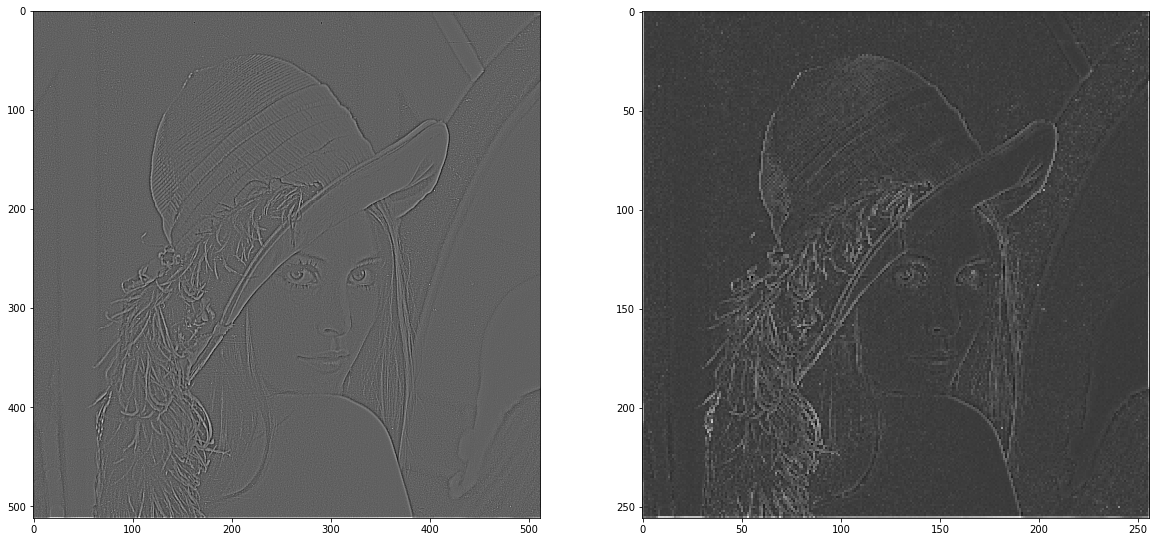

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch_lena = torch.from_numpy(lena).view(1, 1, lena.shape[0], lena.shape[1]).double()
print('image shape', torch_lena.shape)
tv = torch.tensor([[-1., -1., -1.], [-1., 8, -1.], [-1., -1., -1.]])
tv = tv.view(1, 1, 3, 3).double()
convoluted_lena = F.conv2d(torch_lena, tv, torch.tensor([0.], dtype=torch.double), 1, 1, 1, 1)
pooled_lena = F.max_pool2d(convoluted_lena, kernel_size=(2, 2))
print(pooled_lena.shape)
fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(convoluted_lena.numpy().squeeze(), cmap='gray')
axes[1].imshow(pooled_lena.numpy().squeeze(), cmap='gray')
plt.show()

# Ex 4: How Many Parameters Does the VGG net use
The VGG net is a well known neural net architecture for image recognition. 

**How many parameters does it use? Write down a formula and compute the number!**

It has the following architecture [https://pytorch.org/docs/0.4.0/_modules/torchvision/models/vgg.html]

It takes as input an image of size 224 x 224 x 3.

First it computes 64, 3 x 3 convolutions i.e. makes 64 layers. Then it makes 64, 3 x 3 convolutionas on the output of the previous convolution i.e. it makes 64 new layers. This is followd by  a $2 \times 2$ max pooling operation.

The patter continues as described below: A number is the number of new convolutions made on previous input and 'M' means max pooling.

64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'

All convolutions are 3x3 using padding of 1 of zeros around the input so the convolution output size had height and width the same as the input.
All poolings are $2 \times 2$ non-overlapping (stride=2)

After the fully convolutional layers it used standard fully connected layers as
- 512 * 7 * 7, 4096 (why 512 * 7 * 7?)
- 4096, 4096),
- 4096, num_classes=1000
        


## Ex 5: The Auto Encoder - Neural Nets for Unsupervised Learning (data compression)
In this exercise we will see if can in fact compress the digits of dimension 784 x 784 to something much smaller using neural nets using what is known as an autoencoder.

An autoencoder is simply a neural net that learns to map the input to it self, the trick is that the data has to go through the hidden layers and if the hidden layers have smaller dimension or is otherwise constrained then the net must compress the data efficiently to achieve this task.

You must imlement a one hidden layer auto encoder with input dim 784, hidden size h, and output dim 784. In the hidden layer you can use relu activation (or others if you want).
This means there are two weight matrices $W_1$ of shape $784 \times h$ and $W_2$ of shape $h \times 784$ and corresponding bias variables.

For a given input point $x$ of dimension $1 \times 784$ the loss is 

$$
\sum_{i=1}^{d=784} (\textrm{nn}(x)[i] - x[i])^2
$$

Write a neural net in pytorch either using the nn package or just standard pytorch that minimize this cost.

We think of $\textrm{enc}(x) = \textrm{relu}(xW_1 + b_1)$ as the encoding algorithm and $\textrm{dec}(a) = a W_2 + b_2$ as the decoding algorithm

After implementing this we visualize the results as follows:
- Try $h=64$ and see how well the compression works by visualizing the output on several input digits (using imshow and reshape). (you can try other h as well)
- For the same values of $h$ try and visualize the weight matrix $W1$, each column has dimension as $x$ which is 784 so we can visualize it as an image (remember to normalize to norm 1 first).

See the **autoenc.py** file for starter code.

## Ex 6: Standard Deep Learning with Pytorch for digits
We have seen all the tools needed to do deep learning now. So lets try out the neural net package for pytorch.
See https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
for how to use the neural package to write a simple convolutional net and apply to image recognition.

Using this as inspiration write a convolutional net for the digits considered by SVM last time (and in the hand in).

See if you can beat the SVM score from last week (we got around 97 percent accuracy for svm with Gaussian Kernel).

It may not be easy since there are many more buttons to turn on the neural net and so little time to turn them!
But it is very much possible to beat the SVM given enough time to play with the net. 

See **conv_digits.py** for starter code


## Ex 7: Linear Models for Image Recognition
Implement Softmjax Regression in pytorch and see how well you can do in the cifar data set. You need to reshape data to vectors of size 3 x 32 x 32 instead of 3, 32, 32 tensors to use in Logistic Regression (the view command may help you). 
- Do you think the linear model stands a chance. Why, why not
- How high accuracy can you get.


The easiest way is to adapt  https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py to  softmax regression.



## Ex 8: Convolutional Nets Image Recognition
Use convolutional neural nets for cifar and complete beat the linear model. Start from the tutorial or your Ex 6 implementation.

You are welcome to try a standard feed forward first for comparison.


Above 80 percent is achieveable using the tools you have seen but it may require a larger/deeper net and many epochs which take time!!! 